In [195]:
import pandas as pd
df = pd.read_csv('aus.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

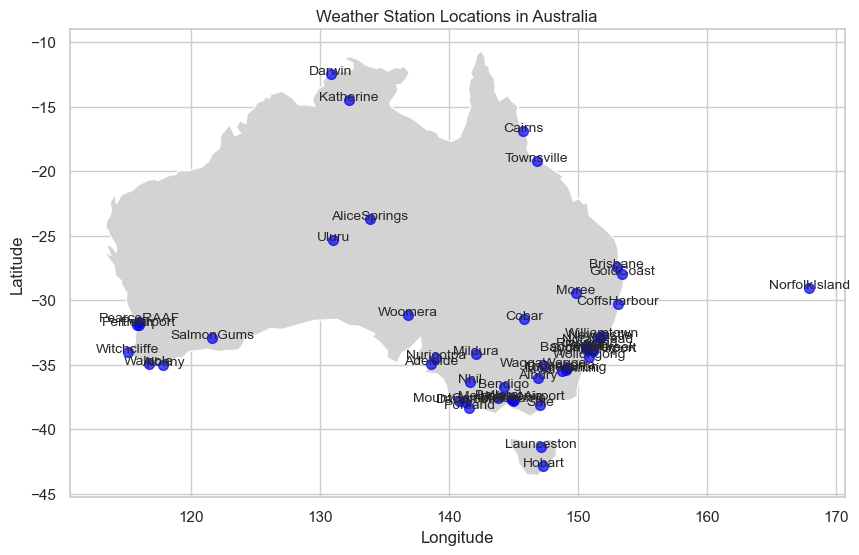

In [196]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map shapefile provided by geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only Australia
australia = world[world.name == 'Australia']

# Define the location coordinates
location_coordinates = {
    'Albury': (-36.0737, 146.9135),
    'BadgerysCreek': (-33.8799, 150.7525),
    'Cobar': (-31.4980, 145.8340),
    'CoffsHarbour': (-30.2960, 153.1150),
    'Moree': (-29.4644, 149.8415),
    'Newcastle': (-32.9169, 151.7500),
    'NorahHead': (-33.2831, 151.5675),
    'NorfolkIsland': (-29.0408, 167.9547),
    'Penrith': (-33.7526, 150.6941),
    'Richmond': (-33.6000, 150.7500),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9461, 151.1772),
    'WaggaWagga': (-35.1150, 147.3677),
    'Williamtown': (-32.8150, 151.8433),
    'Wollongong': (-34.4278, 150.8931),
    'Canberra': (-35.2820, 149.1287),
    'Tuggeranong': (-35.4232, 149.0860),
    'MountGinini': (-35.5294, 148.7727),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7589, 144.2836),
    'Sale': (-38.1119, 147.0634),
    'MelbourneAirport': (-37.6705, 144.8322),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.2083, 142.1244),
    'Nhil': (-36.3328, 141.6502),
    'Portland': (-38.3510, 141.6056),
    'Watsonia': (-37.7117, 145.0835),
    'Dartmoor': (-37.9225, 141.2765),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9186, 145.7781),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2580, 146.8169),
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8284, 140.7815),
    'Nuriootpa': (-34.4694, 139.0057),
    'Woomera': (-31.1995, 136.8254),
    'Albany': (-35.0031, 117.8656),
    'Witchcliffe': (-34.0170, 115.1001),
    'PearceRAAF': (-31.6675, 116.0159),
    'PerthAirport': (-31.9405, 115.9660),
    'Perth': (-31.9505, 115.8605),
    'SalmonGums': (-32.9817, 121.6437),
    'Walpole': (-34.9773, 116.7311),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4298, 147.1401),
    'AliceSprings': (-23.7002, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4640, 132.2635),
    'Uluru': (-25.3444, 131.0369)
}

# Create a GeoDataFrame for the locations
geometry = gpd.points_from_xy([coord[1] for coord in location_coordinates.values()], [coord[0] for coord in location_coordinates.values()])
gdf = gpd.GeoDataFrame(location_coordinates.keys(), geometry=geometry, columns=['Location'])

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
australia.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=50, color='blue', alpha=0.7)

# Add labels for each location
for idx, row in gdf.iterrows():
    ax.annotate(row['Location'], (row['geometry'].x, row['geometry'].y), fontsize=10, ha='center')

# Set title and axis labels
ax.set_title('Weather Station Locations in Australia')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

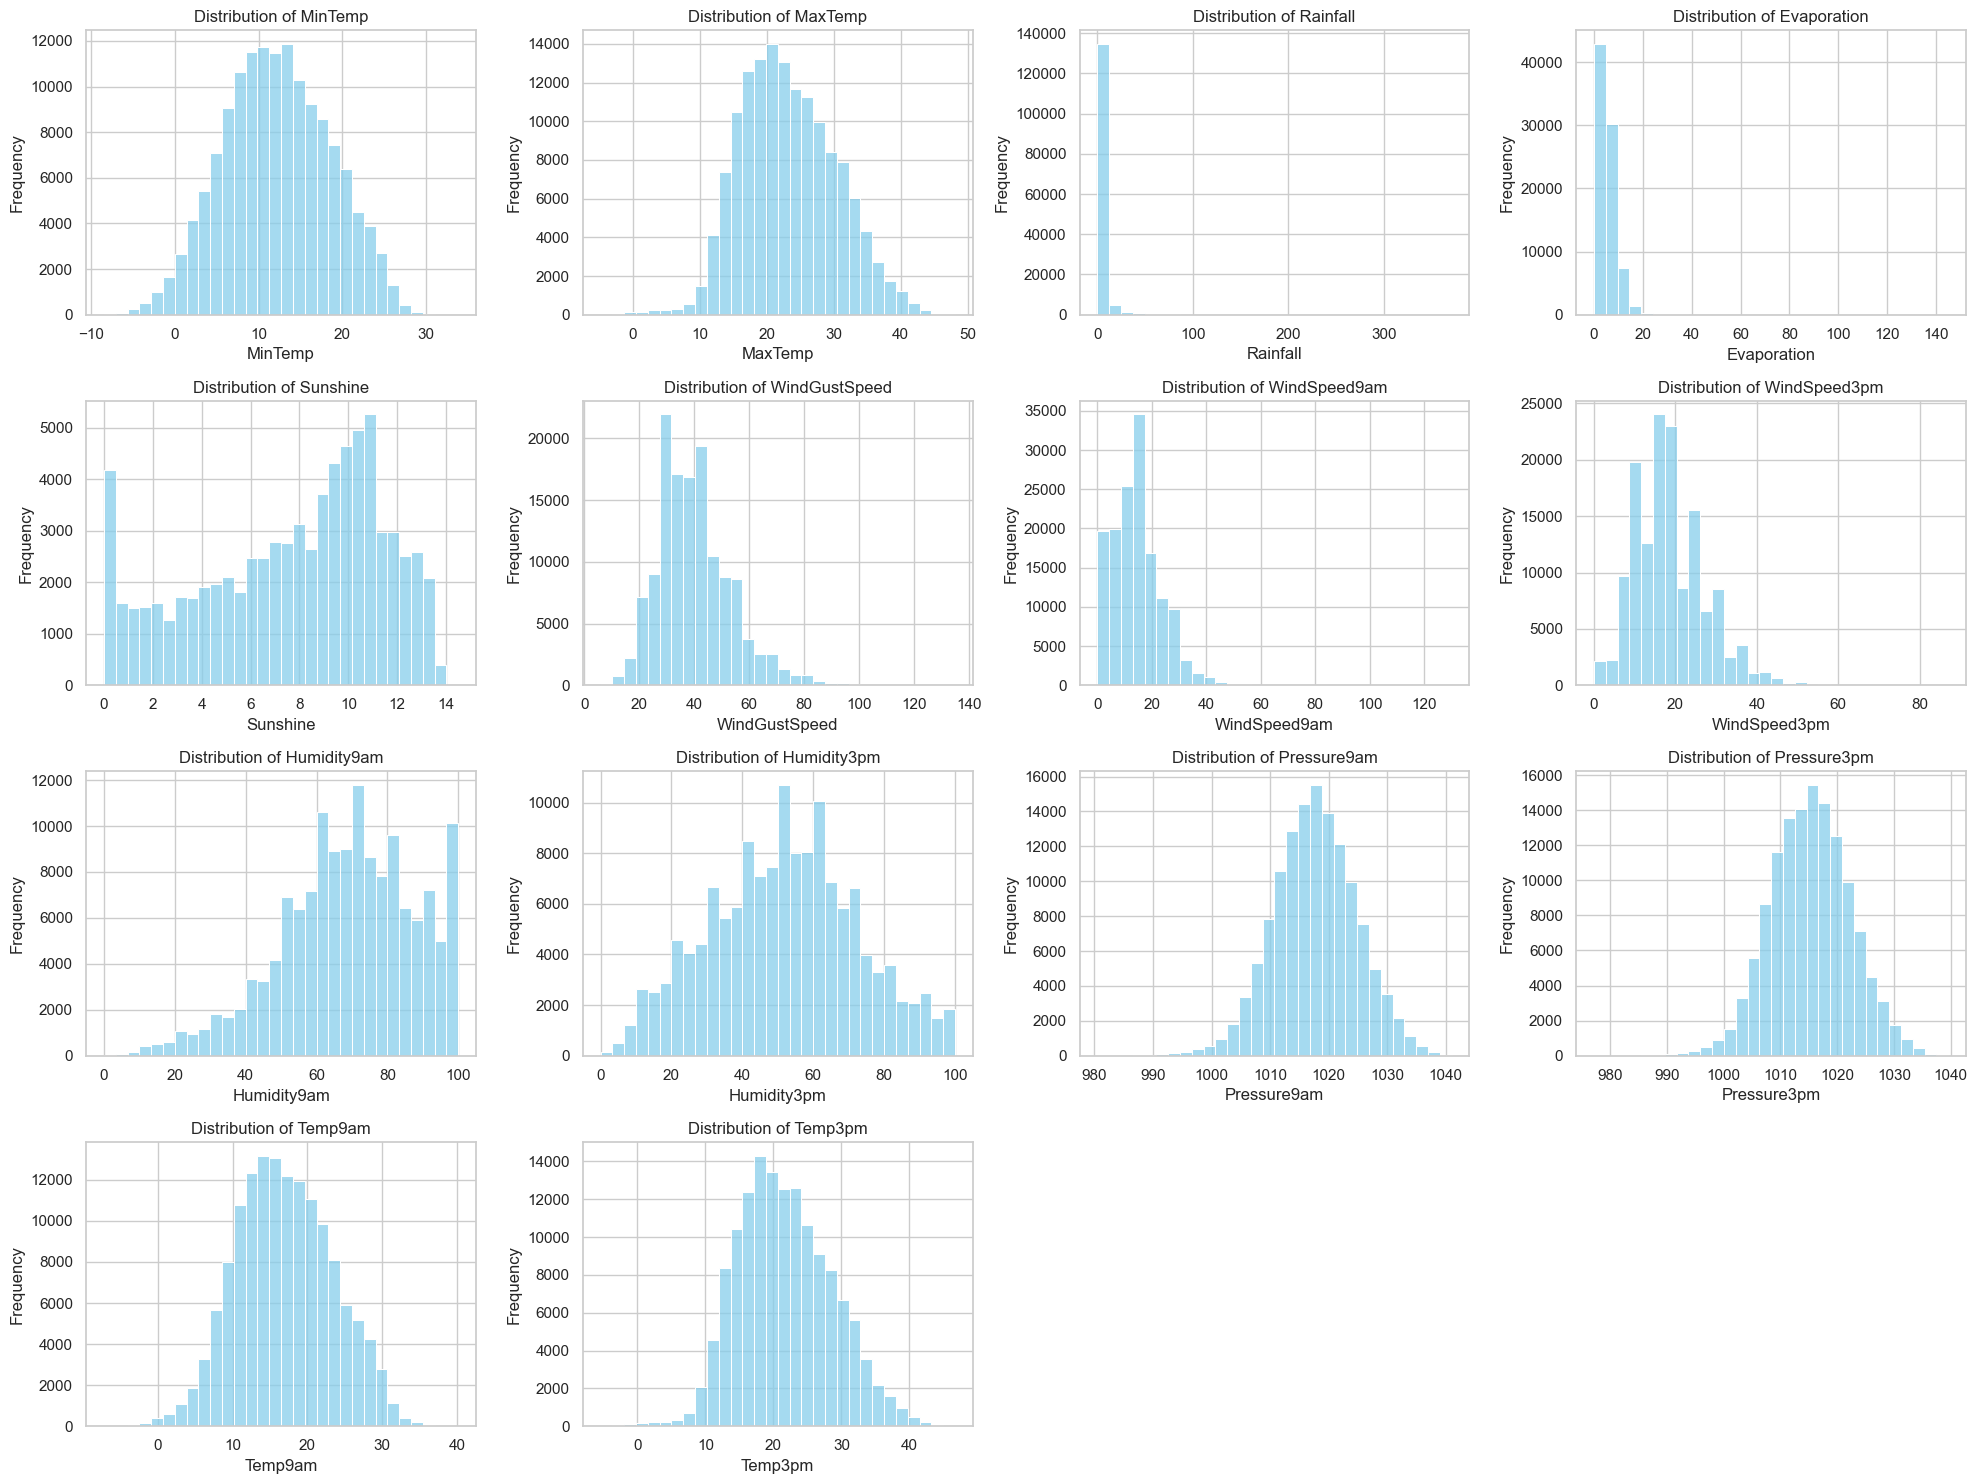

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create a list of numerical columns to visualize
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
                     'Humidity9am', 'Humidity3pm', 
                     'Pressure9am', 'Pressure3pm', 
                     'Temp9am', 'Temp3pm']

# Create subplots for each column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], bins=30, kde=False, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

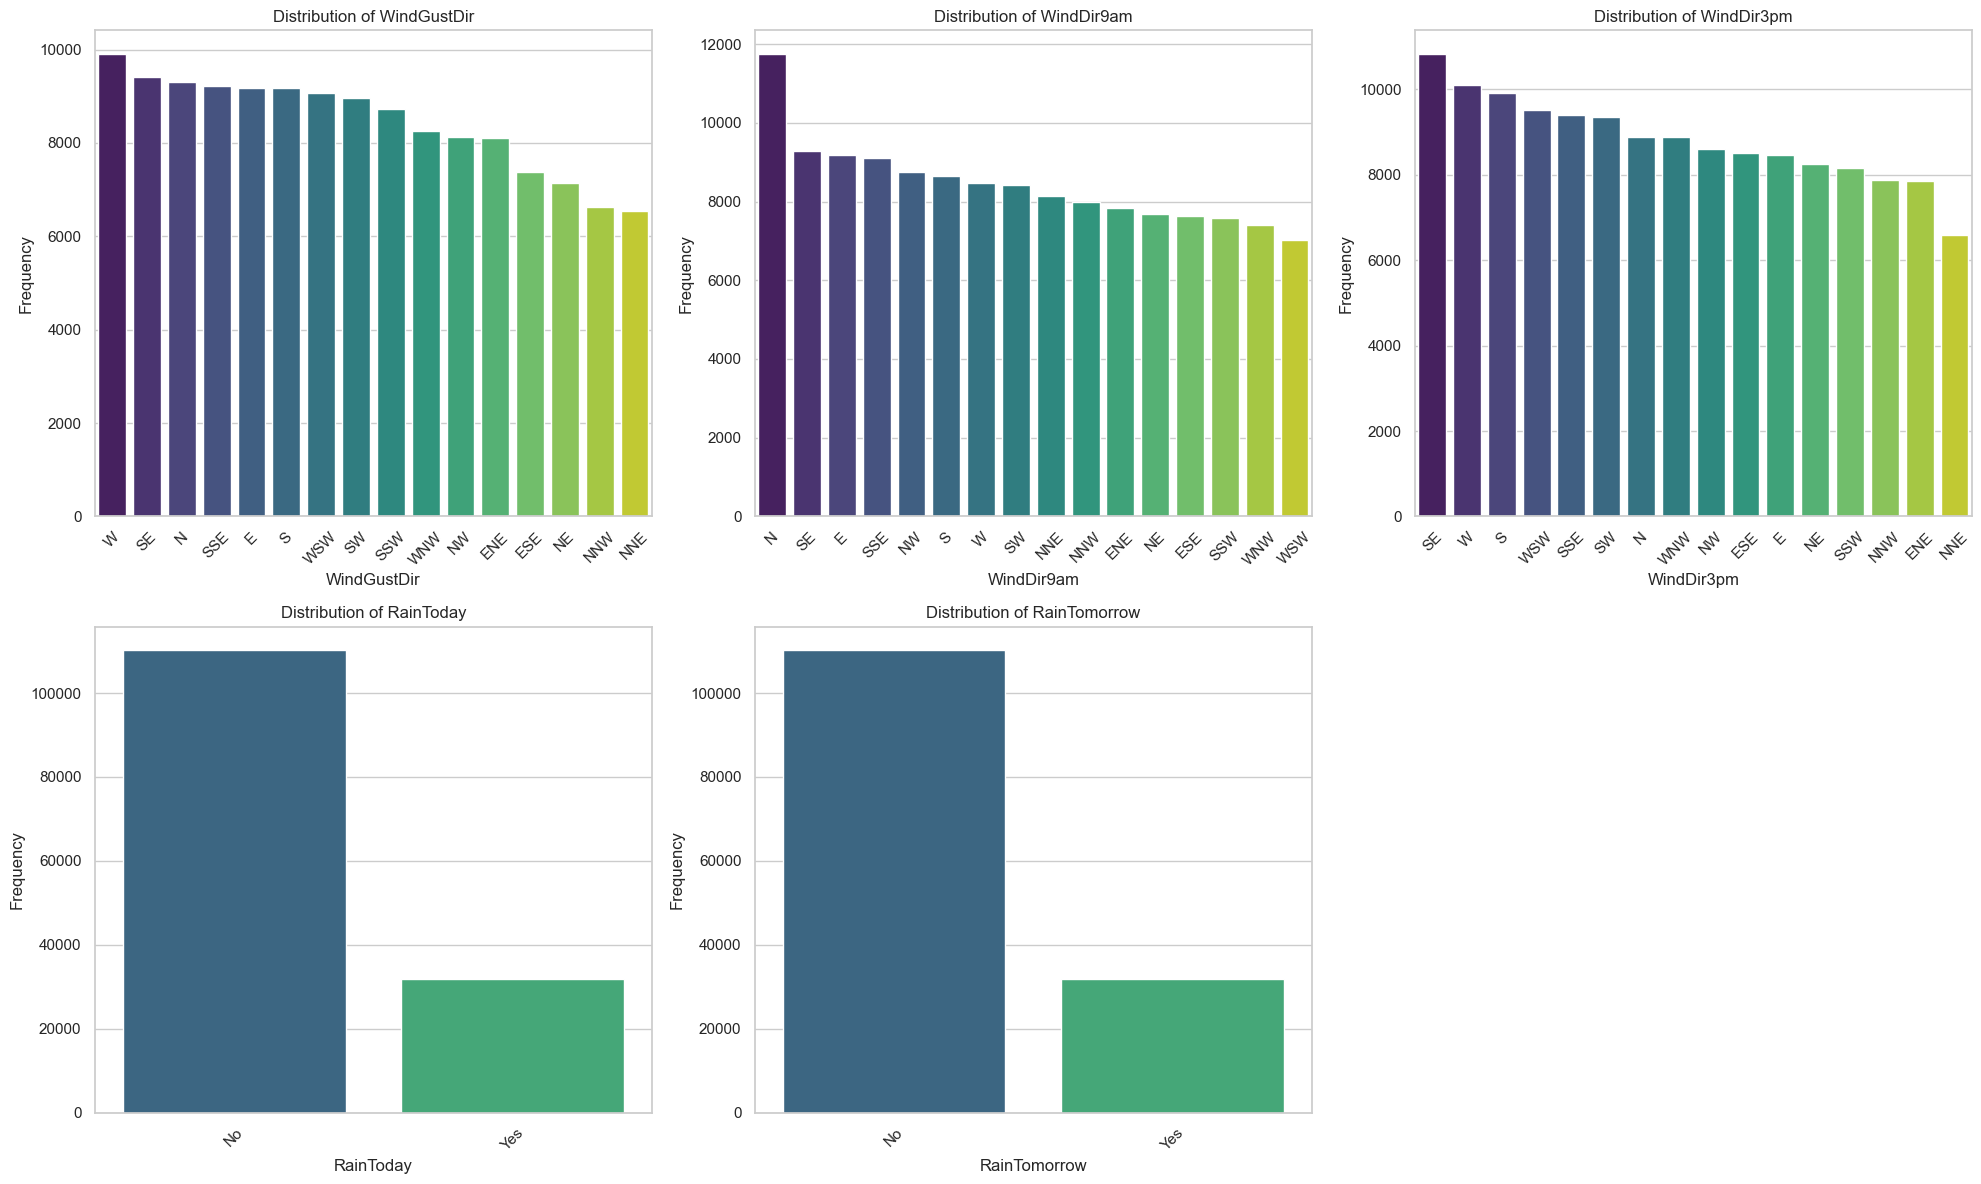

In [198]:
# Initialize the figure
plt.figure(figsize=(20, 12))

# Create a list of categorical columns to visualize
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

# Create subplots for each column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

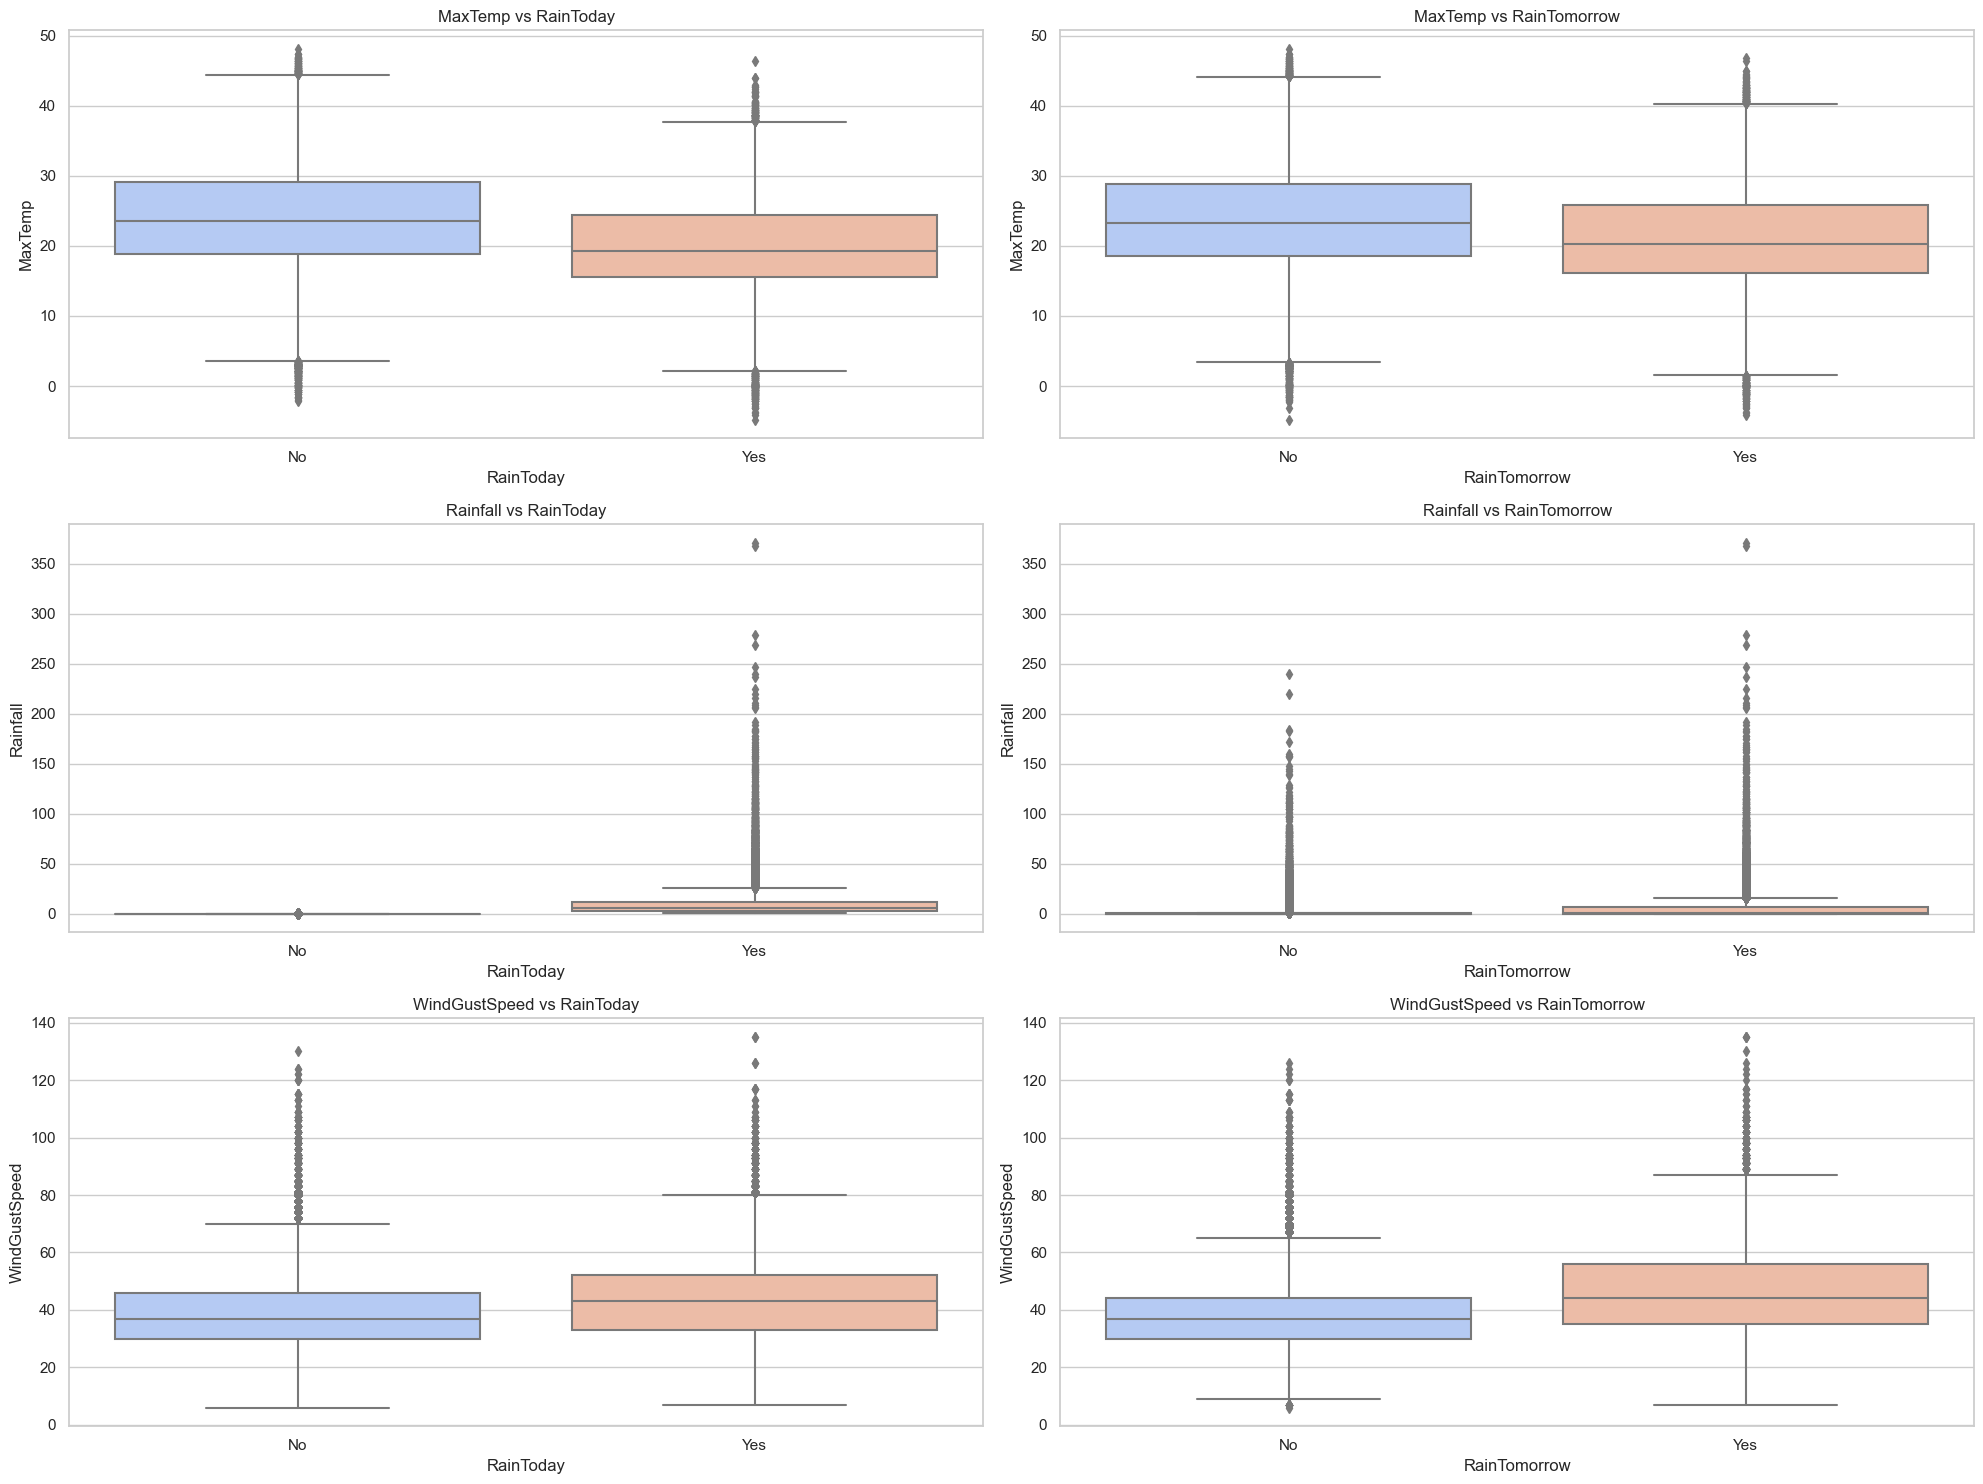

In [199]:
# Initialize the figure
plt.figure(figsize=(20, 15))

# List of numerical features to visualize
numerical_features_to_compare = ['MaxTemp', 'Rainfall', 'WindGustSpeed']

# Create subplots for each combination of numerical feature and categorical feature ('RainToday' and 'RainTomorrow')
for i, num_feature in enumerate(numerical_features_to_compare, 1):
    for j, cat_feature in enumerate(['RainToday', 'RainTomorrow'], 1):
        plt.subplot(3, 2, 2*(i-1) + j)
        sns.boxplot(data=df, x=cat_feature, y=num_feature, palette='coolwarm')
        plt.title(f'{num_feature} vs {cat_feature}')
        plt.xlabel(cat_feature)
        plt.ylabel(num_feature)

# Adjust layout
plt.tight_layout()
plt.show()


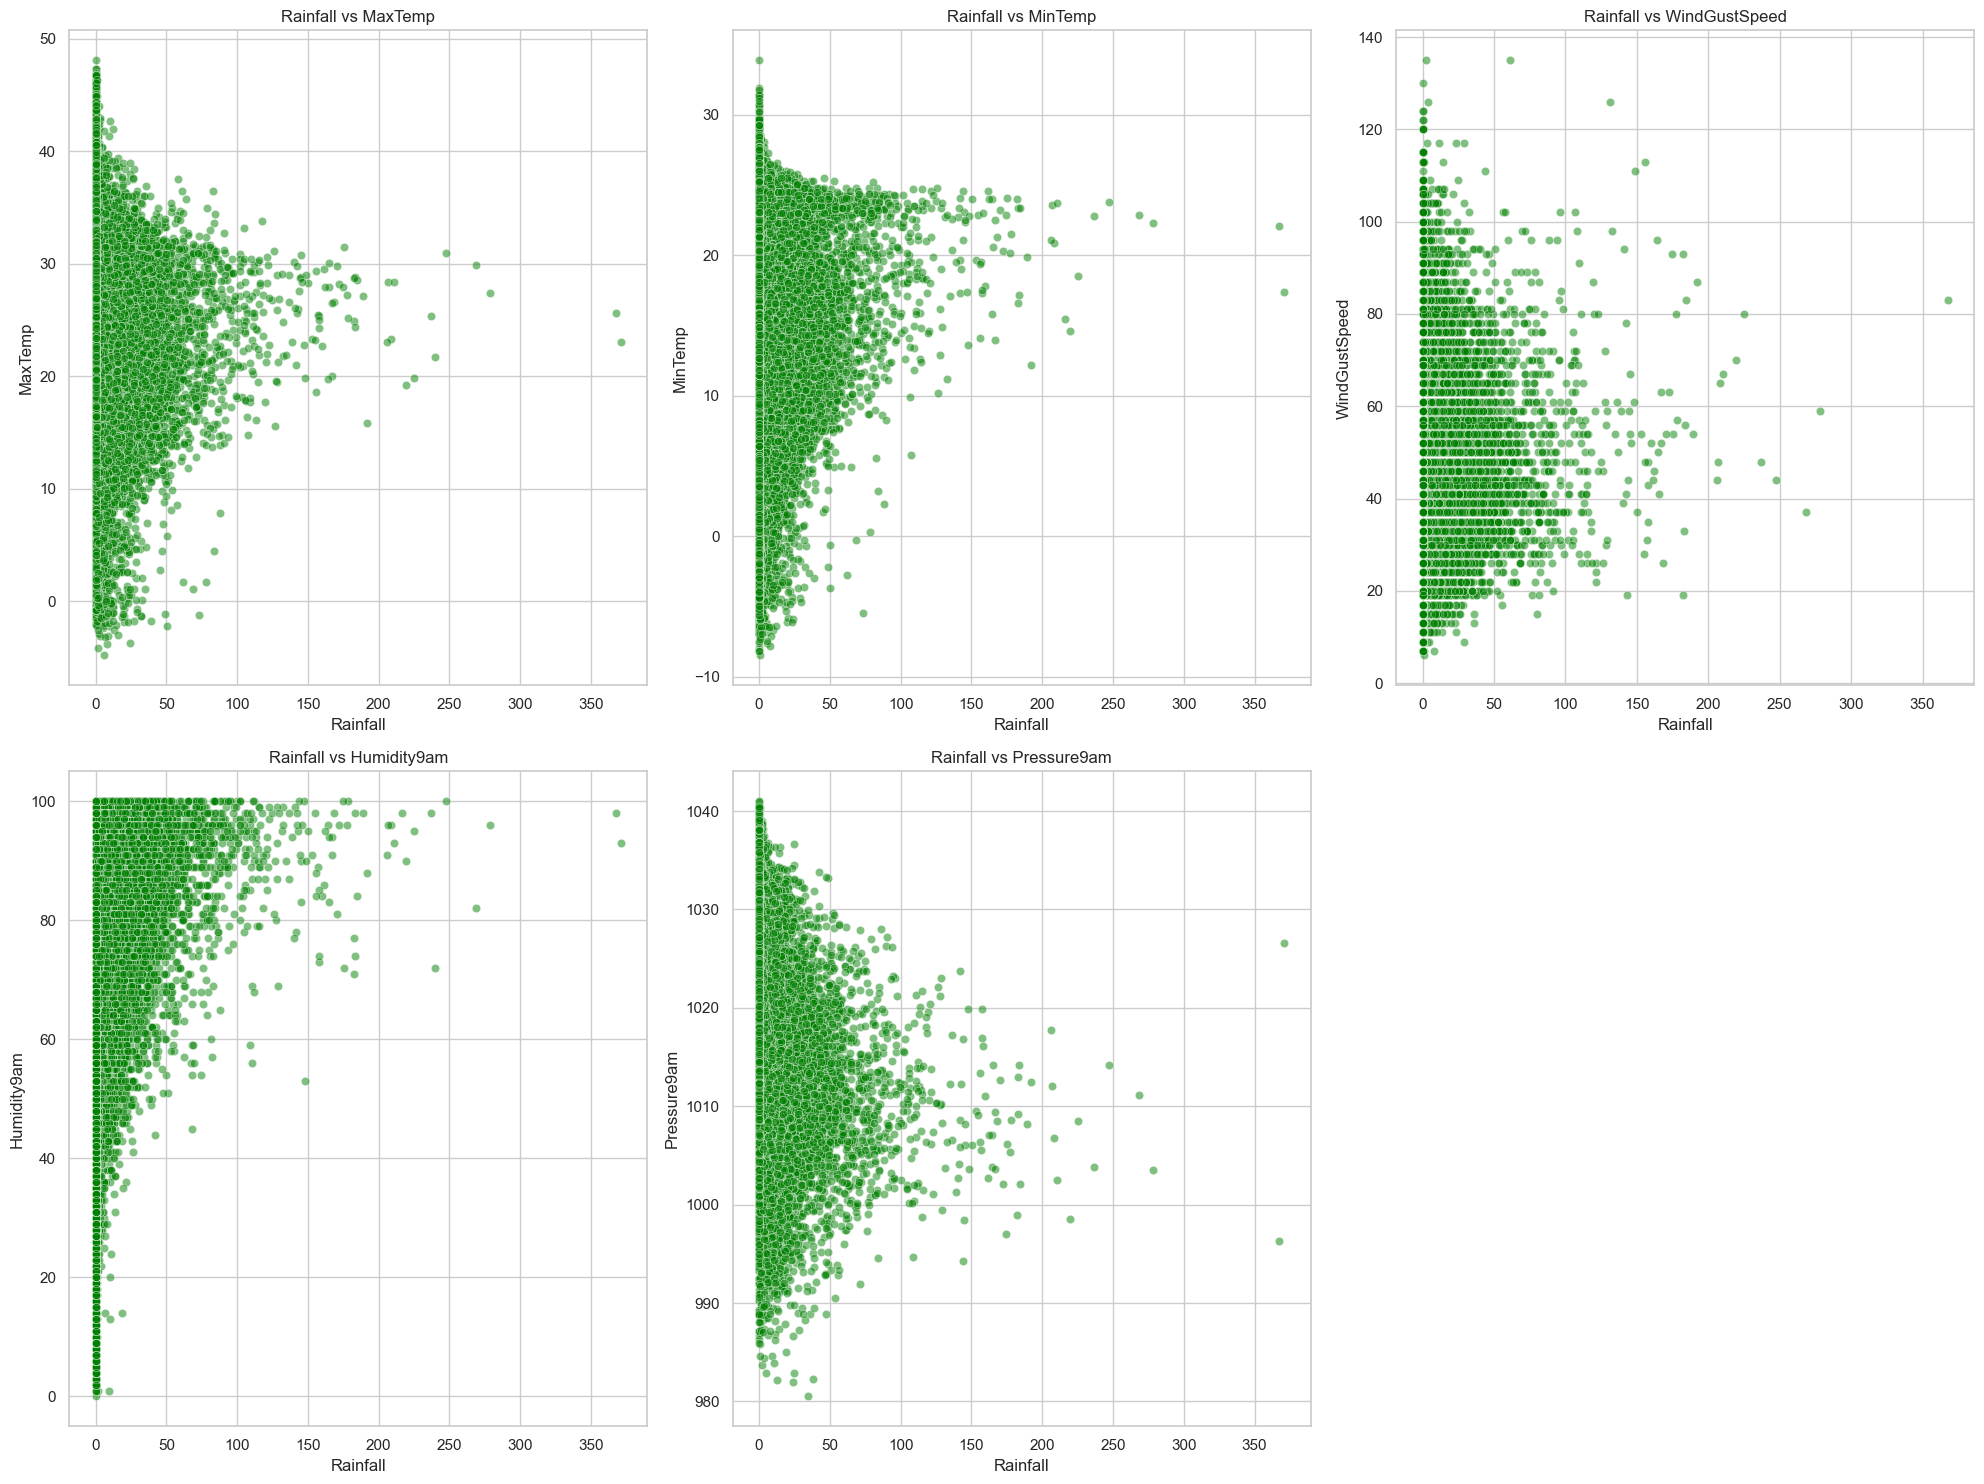

In [200]:
# Initialize the figure
plt.figure(figsize=(20, 15))

# List of numerical features to compare with 'Rainfall'
features_to_compare_with_rainfall = ['MaxTemp', 'MinTemp', 'WindGustSpeed', 'Humidity9am', 'Pressure9am']

# Create subplots for each feature to compare with 'Rainfall'
for i, feature in enumerate(features_to_compare_with_rainfall, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x='Rainfall', y=feature, alpha=0.5, color='green')
    plt.title(f'Rainfall vs {feature}')
    plt.xlabel('Rainfall')
    plt.ylabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

In [201]:
# # Drop columns with a large number of missing values
# columns_to_drop = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']
# df_dropped_columns = df.drop(columns=columns_to_drop)

# # Show the first few rows of the modified dataset
# df_dropped_columns.head()


Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No           No  
1       1010.6       1007.8     17.2     24.3        No           No  
2       1007.6       1008.7     21.0     23.2        No           No  
3       1017.6       1012.8     18.1     26.5        No           No  
4       1010.8       1006.0     17.8     29.7        No           No

In [202]:
# # Impute 'RainToday' based on 'Rainfall' values
# df_dropped_columns['RainToday'].fillna(df_dropped_columns['Rainfall'].apply(lambda x: 'Yes' if x > 0 else 'No'), inplace=True)

# # Check if there are still any missing values in 'RainToday'
# df_dropped_columns['RainToday'].isnull().sum()

0

In [203]:
# # Convert the 'Date' column to datetime format
# df_dropped_columns['Date'] = pd.to_datetime(df_dropped_columns['Date'])

# # Sort the data by 'Location' and 'Date'
# df_dropped_columns.sort_values(by=['Location', 'Date'], inplace=True)

# # Show the first few rows of the dataset after sorting
# df_dropped_columns.head()

Date  Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
96320 2008-07-01  Adelaide      8.8     15.7       5.0          NW   
96321 2008-07-02  Adelaide     12.7     15.8       0.8          SW   
96322 2008-07-03  Adelaide      6.2     15.1       0.0           W   
96323 2008-07-04  Adelaide      5.3     15.9       0.0         NNE   
96324 2008-07-05  Adelaide      9.8     15.4       0.0           N   

       WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
96320           48.0         SW          W          13.0          15.0   
96321           35.0        SSW         SW          13.0          15.0   
96322           20.0        NNE         SW           2.0          11.0   
96323           30.0        NNE         NE           6.0          13.0   
96324           30.0        NNE         NE           9.0           9.0   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
96320         92.0         67.0       1017.4       1017.7     13.5     14.9   
96321         75.0         52.0       1022.4       1022.6     13.7     15.5   
96322         81.0         56.0       1027.8       1026.5      9.3     13.9   
96323         71.0         46.0       1028.7       1025.6     10.2     15.3   
96324         56.0         67.0       1023.6       1020.2     11.3     13.8   

      RainToday RainTomorrow  
96320       Yes           No  
96321        No           No  
96322        No           No  
96323        No           No  
96324        No          NaN

In [204]:
# # Combine the steps for handling missing values using time-weighted interpolation, with fix for the 'Location' issue

# # Start with the original DataFrame (df) for demonstration
# df_copy = df.copy()

# # 1. Impute 'RainToday' based on 'Rainfall' values
# df_copy['RainToday'].fillna(df_copy['Rainfall'].apply(lambda x: 'Yes' if x > 0 else 'No'), inplace=True)

# # 2. Drop columns with a large number of missing values
# columns_to_drop = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']
# df_dropped_columns = df_copy.drop(columns=columns_to_drop)

# # 3. Convert 'Date' column to datetime data type
# df_dropped_columns['Date'] = pd.to_datetime(df_dropped_columns['Date'])

# # 4. Sort the DataFrame by 'Location' and 'Date'
# df_dropped_columns.sort_values(by=['Location', 'Date'], inplace=True)

# # 5. Set 'Date' as the DatetimeIndex
# df_dropped_columns.set_index('Date', inplace=True)

# # 6. Perform time-weighted interpolation for each location group
# df_interpolated = df_dropped_columns.groupby('Location').apply(lambda group: group.interpolate(method='time'))

# # 7. Drop the 'Location' level from the index to avoid the "already exists" issue
# df_interpolated.index = df_interpolated.index.droplevel(0)

# # 8. Reset the index to make 'Date' a column again
# df_interpolated.reset_index(inplace=True)

# # 9. Check if there are still any missing values
# remaining_missing_after_interpolation = df_interpolated.isnull().sum()
# remaining_missing_after_interpolation = remaining_missing_after_interpolation[remaining_missing_after_interpolation > 0]
# remaining_missing_after_interpolation.sort_values(ascending=False)

# # Show remaining missing values
# remaining_missing_after_interpolation


MinTemp             67
MaxTemp             66
Rainfall            67
WindGustDir      10326
WindGustSpeed     7266
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am        68
WindSpeed3pm        68
Humidity9am         87
Humidity3pm         86
Pressure9am      12183
Pressure3pm      12184
Temp9am             68
Temp3pm             68
RainTomorrow      3267
dtype: int64

In [205]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# # Create a deep copy of the DataFrame to hold the imputed values
# df_imputed = df_interpolated.copy(deep=True)

# # Identify categorical columns for mode imputation
# categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# # Perform mode imputation for categorical columns
# for col in categorical_columns:
#     mode_value = df_imputed[col].mode()[0]
#     df_imputed[col].fillna(mode_value, inplace=True)

# # Perform MICE imputation for numerical columns
# # Create an imputer object
# mice_imputer = IterativeImputer()

# # Identify numerical columns for MICE imputation
# numerical_columns = df_imputed.select_dtypes(include=['float64']).columns.tolist()

# # Perform the imputation
# df_imputed[numerical_columns] = mice_imputer.fit_transform(df_imputed[numerical_columns])

# # Check if there are still any missing values
# remaining_missing_after_all_imputations = df_imputed.isnull().sum()
# remaining_missing_after_all_imputations = remaining_missing_after_all_imputations[remaining_missing_after_all_imputations > 0]
# remaining_missing_after_all_imputations.sort_values(ascending=False)


RainTomorrow    3267
dtype: int64

In [206]:
# # Remove rows where the target variable 'RainTomorrow' is missing
# df_imputed.dropna(subset=['RainTomorrow'], inplace=True)

# # Check again for any remaining missing values
# remaining_missing_final = df_imputed.isnull().sum()
# remaining_missing_final = remaining_missing_final[remaining_missing_final > 0]
# remaining_missing_final.sort_values(ascending=False)

Series([], dtype: int64)

In [207]:
# import pandas as pd
full_data = df.copy()
full_data.head()


Date  Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0 2008-07-01  Adelaide      8.8     15.7       5.0          NW           48.0   
1 2008-07-02  Adelaide     12.7     15.8       0.8          SW           35.0   
2 2008-07-03  Adelaide      6.2     15.1       0.0           W           20.0   
3 2008-07-04  Adelaide      5.3     15.9       0.0         NNE           30.0   
5 2008-07-06  Adelaide     11.3     15.7       8.1         NNW           52.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0         SW          W          13.0          15.0         92.0         67.0   
1        SSW         SW          13.0          15.0         75.0         52.0   
2        NNE         SW           2.0          11.0         81.0         56.0   
3        NNE         NE           6.0          13.0         71.0         46.0   
5        NNE        NNW          15.0          22.0         62.0         62.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1017.4       1017.7     13.5     14.9       Yes           No  
1       1022.4       1022.6     13.7     15.5        No           No  
2       1027.8       1026.5      9.3     13.9        No           No  
3       1028.7       1025.6     10.2     15.3        No           No  
5       1019.5       1016.2     13.0     14.4        No          Yes

In [208]:
full_data['Date'] = pd.to_datetime(full_data['Date'])
full_data['year'] = full_data['Date'].dt.year
full_data['month'] = full_data['Date'].dt.month
full_data['day'] = full_data['Date'].dt.day
full_data.drop(['Date'], axis = 1,inplace=True) 
full_data.head()

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0  Adelaide      8.8     15.7       5.0          NW           48.0         SW   
1  Adelaide     12.7     15.8       0.8          SW           35.0        SSW   
2  Adelaide      6.2     15.1       0.0           W           20.0        NNE   
3  Adelaide      5.3     15.9       0.0         NNE           30.0        NNE   
5  Adelaide     11.3     15.7       8.1         NNW           52.0        NNE   

  WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  Pressure9am  \
0          W          13.0          15.0  ...         67.0       1017.4   
1         SW          13.0          15.0  ...         52.0       1022.4   
2         SW           2.0          11.0  ...         56.0       1027.8   
3         NE           6.0          13.0  ...         46.0       1028.7   
5        NNW          15.0          22.0  ...         62.0       1019.5   

   Pressure3pm  Temp9am  Temp3pm  RainToday RainTomorrow  year  month  day  
0       1017.7     13.5     14.9        Yes           No  2008      7    1  
1       1022.6     13.7     15.5         No           No  2008      7    2  
2       1026.5      9.3     13.9         No           No  2008      7    3  
3       1025.6     10.2     15.3         No           No  2008      7    4  
5       1016.2     13.0     14.4         No          Yes  2008      7    6  

[5 rows x 21 columns]

In [209]:
full_data.shape

(142193, 21)

In [210]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustDir    142193 non-null  object 
 5   WindGustSpeed  142193 non-null  float64
 6   WindDir9am     142193 non-null  object 
 7   WindDir3pm     142193 non-null  object 
 8   WindSpeed9am   142193 non-null  float64
 9   WindSpeed3pm   142193 non-null  float64
 10  Humidity9am    142193 non-null  float64
 11  Humidity3pm    142193 non-null  float64
 12  Pressure9am    142193 non-null  float64
 13  Pressure3pm    142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
 16  RainToday      142193 non-null  object 
 17  RainTomorrow   142193 non-null  ob

In [211]:
full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data.head()

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0  Adelaide      8.8     15.7       5.0          NW           48.0         SW   
1  Adelaide     12.7     15.8       0.8          SW           35.0        SSW   
2  Adelaide      6.2     15.1       0.0           W           20.0        NNE   
3  Adelaide      5.3     15.9       0.0         NNE           30.0        NNE   
5  Adelaide     11.3     15.7       8.1         NNW           52.0        NNE   

  WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  Pressure9am  \
0          W          13.0          15.0  ...         67.0       1017.4   
1         SW          13.0          15.0  ...         52.0       1022.4   
2         SW           2.0          11.0  ...         56.0       1027.8   
3         NE           6.0          13.0  ...         46.0       1028.7   
5        NNW          15.0          22.0  ...         62.0       1019.5   

   Pressure3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0       1017.7     13.5     14.9          1             0  2008      7    1  
1       1022.6     13.7     15.5          0             0  2008      7    2  
2       1026.5      9.3     13.9          0             0  2008      7    3  
3       1025.6     10.2     15.3          0             0  2008      7    4  
5       1016.2     13.0     14.4          0             1  2008      7    6  

[5 rows x 21 columns]

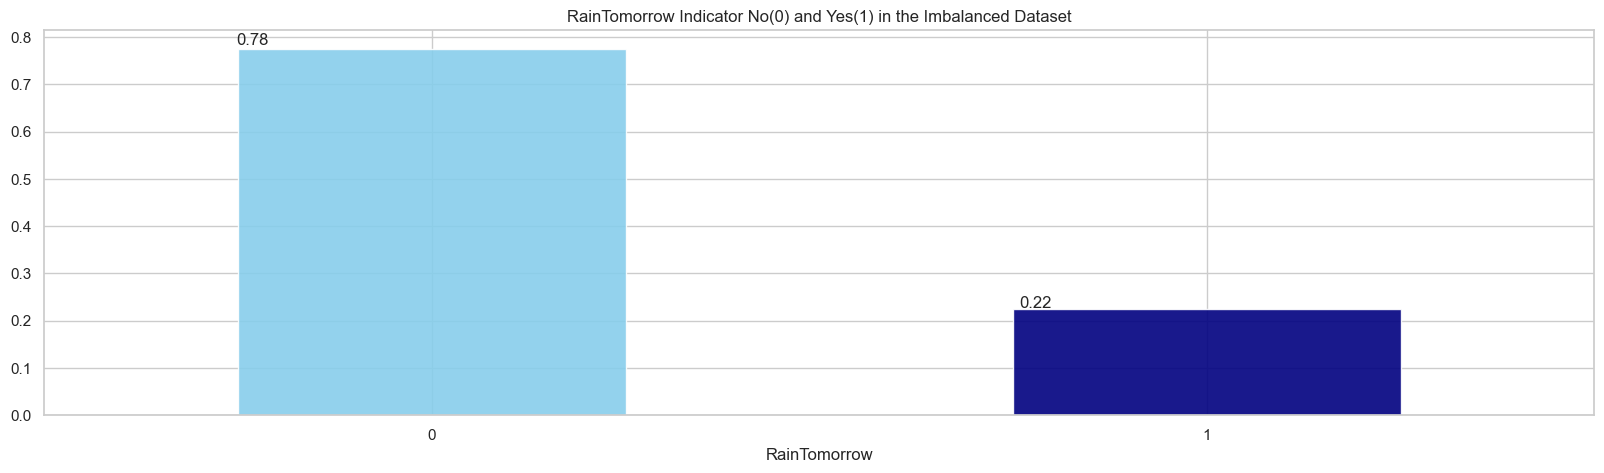

In [212]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,5))
ax=full_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

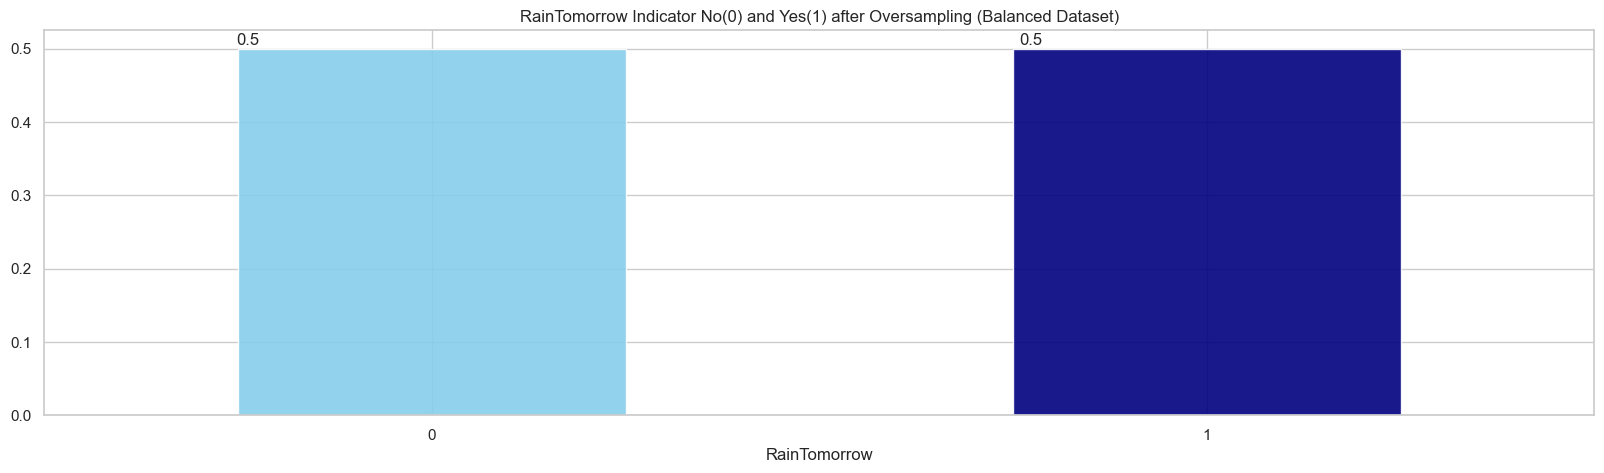

In [213]:
from sklearn.utils import resample

no = full_data[full_data.RainTomorrow == 0]
yes = full_data[full_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (20,5))
ax=oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

In [214]:
# # Missing Data Pattern in Training Data
# import seaborn as sns
# plt.figure(figsize = (20,5))
# sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')
# plt.show()

In [215]:
# total = oversampled.isnull().sum().sort_values(ascending=False)
# percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
# missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing.head()

In [216]:
# oversampled.select_dtypes(include=['object']).columns

In [217]:
# # Impute categorical var with Mode
# oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
# oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
# oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
# oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [218]:
# # Convert categorical features to continuous features with Label Encoding
# from sklearn.preprocessing import LabelEncoder
# lencoders = {}
# for col in oversampled.select_dtypes(include=['object']).columns:
#     lencoders[col] = LabelEncoder()
#     oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [219]:
# import warnings
# warnings.filterwarnings("ignore")
# # Multiple Imputation by Chained Equations
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# MiceImputed = oversampled.copy(deep=True) 
# mice_imputer = IterativeImputer()
# MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [220]:
# # Detecting outliers with IQR
# Q1 = MiceImputed.quantile(0.25)
# Q3 = MiceImputed.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [221]:
# # Removing outliers from the dataset
# MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
# MiceImputed.shape

In [222]:
# Convert binary columns 'RainToday' and 'RainTomorrow' to numerical format (1 for 'Yes', 0 for 'No')
df_imputed['RainToday'] = df_imputed['RainToday'].map({'Yes': 1, 'No': 0})
df_imputed['RainTomorrow'] = df_imputed['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Perform one-hot encoding for other categorical columns
categorical_columns_to_onehot = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df_onehot = pd.get_dummies(df_imputed, columns=categorical_columns_to_onehot, drop_first=True)

# Show the first few rows of the fully numerical DataFrame
df_onehot.head()

Date  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0 2008-07-01      8.8     15.7       5.0           48.0          13.0   
1 2008-07-02     12.7     15.8       0.8           35.0          13.0   
2 2008-07-03      6.2     15.1       0.0           20.0           2.0   
3 2008-07-04      5.3     15.9       0.0           30.0           6.0   
5 2008-07-06     11.3     15.7       8.1           52.0          15.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  ...  WindDir3pm_NNW  \
0          15.0         92.0         67.0       1017.4  ...           False   
1          15.0         75.0         52.0       1022.4  ...           False   
2          11.0         81.0         56.0       1027.8  ...           False   
3          13.0         71.0         46.0       1028.7  ...           False   
5          22.0         62.0         62.0       1019.5  ...            True   

   WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
0          False         False          False           False           False   
1          False         False          False           False           False   
2          False         False          False           False           False   
3          False         False          False           False           False   
5          False         False          False           False           False   

   WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  
0          False          True           False           False  
1           True         False           False           False  
2           True         False           False           False  
3          False         False           False           False  
5          False         False           False           False  

[5 rows x 108 columns]

In [229]:

MiceImputed = df_onehot.copy()
MiceImputed

Date  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0      2008-07-01      8.8     15.7       5.0           48.0          13.0   
1      2008-07-02     12.7     15.8       0.8           35.0          13.0   
2      2008-07-03      6.2     15.1       0.0           20.0           2.0   
3      2008-07-04      5.3     15.9       0.0           30.0           6.0   
5      2008-07-06     11.3     15.7       8.1           52.0          15.0   
...           ...      ...      ...       ...            ...           ...   
145454 2017-06-20      5.6     19.7       0.0           20.0           9.0   
145455 2017-06-21      5.8     19.9       0.0           22.0          11.0   
145456 2017-06-22      7.8     19.0       0.0           31.0          13.0   
145457 2017-06-23      8.0     22.5       0.0           33.0          13.0   
145458 2017-06-24     11.5     20.9       0.0           33.0           9.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  ...  \
0               15.0         92.0         67.0       1017.4  ...   
1               15.0         75.0         52.0       1022.4  ...   
2               11.0         81.0         56.0       1027.8  ...   
3               13.0         71.0         46.0       1028.7  ...   
5               22.0         62.0         62.0       1019.5  ...   
...              ...          ...          ...          ...  ...   
145454           7.0         61.0         28.0       1028.1  ...   
145455           9.0         52.0         22.0       1027.9  ...   
145456          17.0         48.0         37.0       1025.8  ...   
145457          15.0         57.0         31.0       1021.0  ...   
145458          20.0         61.0         35.0       1019.5  ...   

        WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  \
0                False          False         False          False   
1                False          False         False          False   
2                False          False         False          False   
3                False          False         False          False   
5                 True          False         False          False   
...                ...            ...           ...            ...   
145454           False          False         False          False   
145455           False          False         False          False   
145456            True          False         False          False   
145457           False           True         False          False   
145458           False          False         False          False   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0                False           False          False          True   
1                False           False           True         False   
2                False           False           True         False   
3                False           False          False         False   
5                False           False          False         False   
...                ...             ...            ...           ...   
145454           False           False          False         False   
145455           False           False          False         False   
145456           False           False          False         False   
145457           False           False          False         False   
145458           False           False          False         False   

        WindDir3pm_WNW  WindDir3pm_WSW  
0                False           False  
1                False           False  
2                False           False  
3                False           False  
5                False           False  
...                ...             ...  
145454           False           False  
145455           False           False  
145456           False           False  
145457           False           False  
145458           False            True  

[142193 rows x 108 columns]

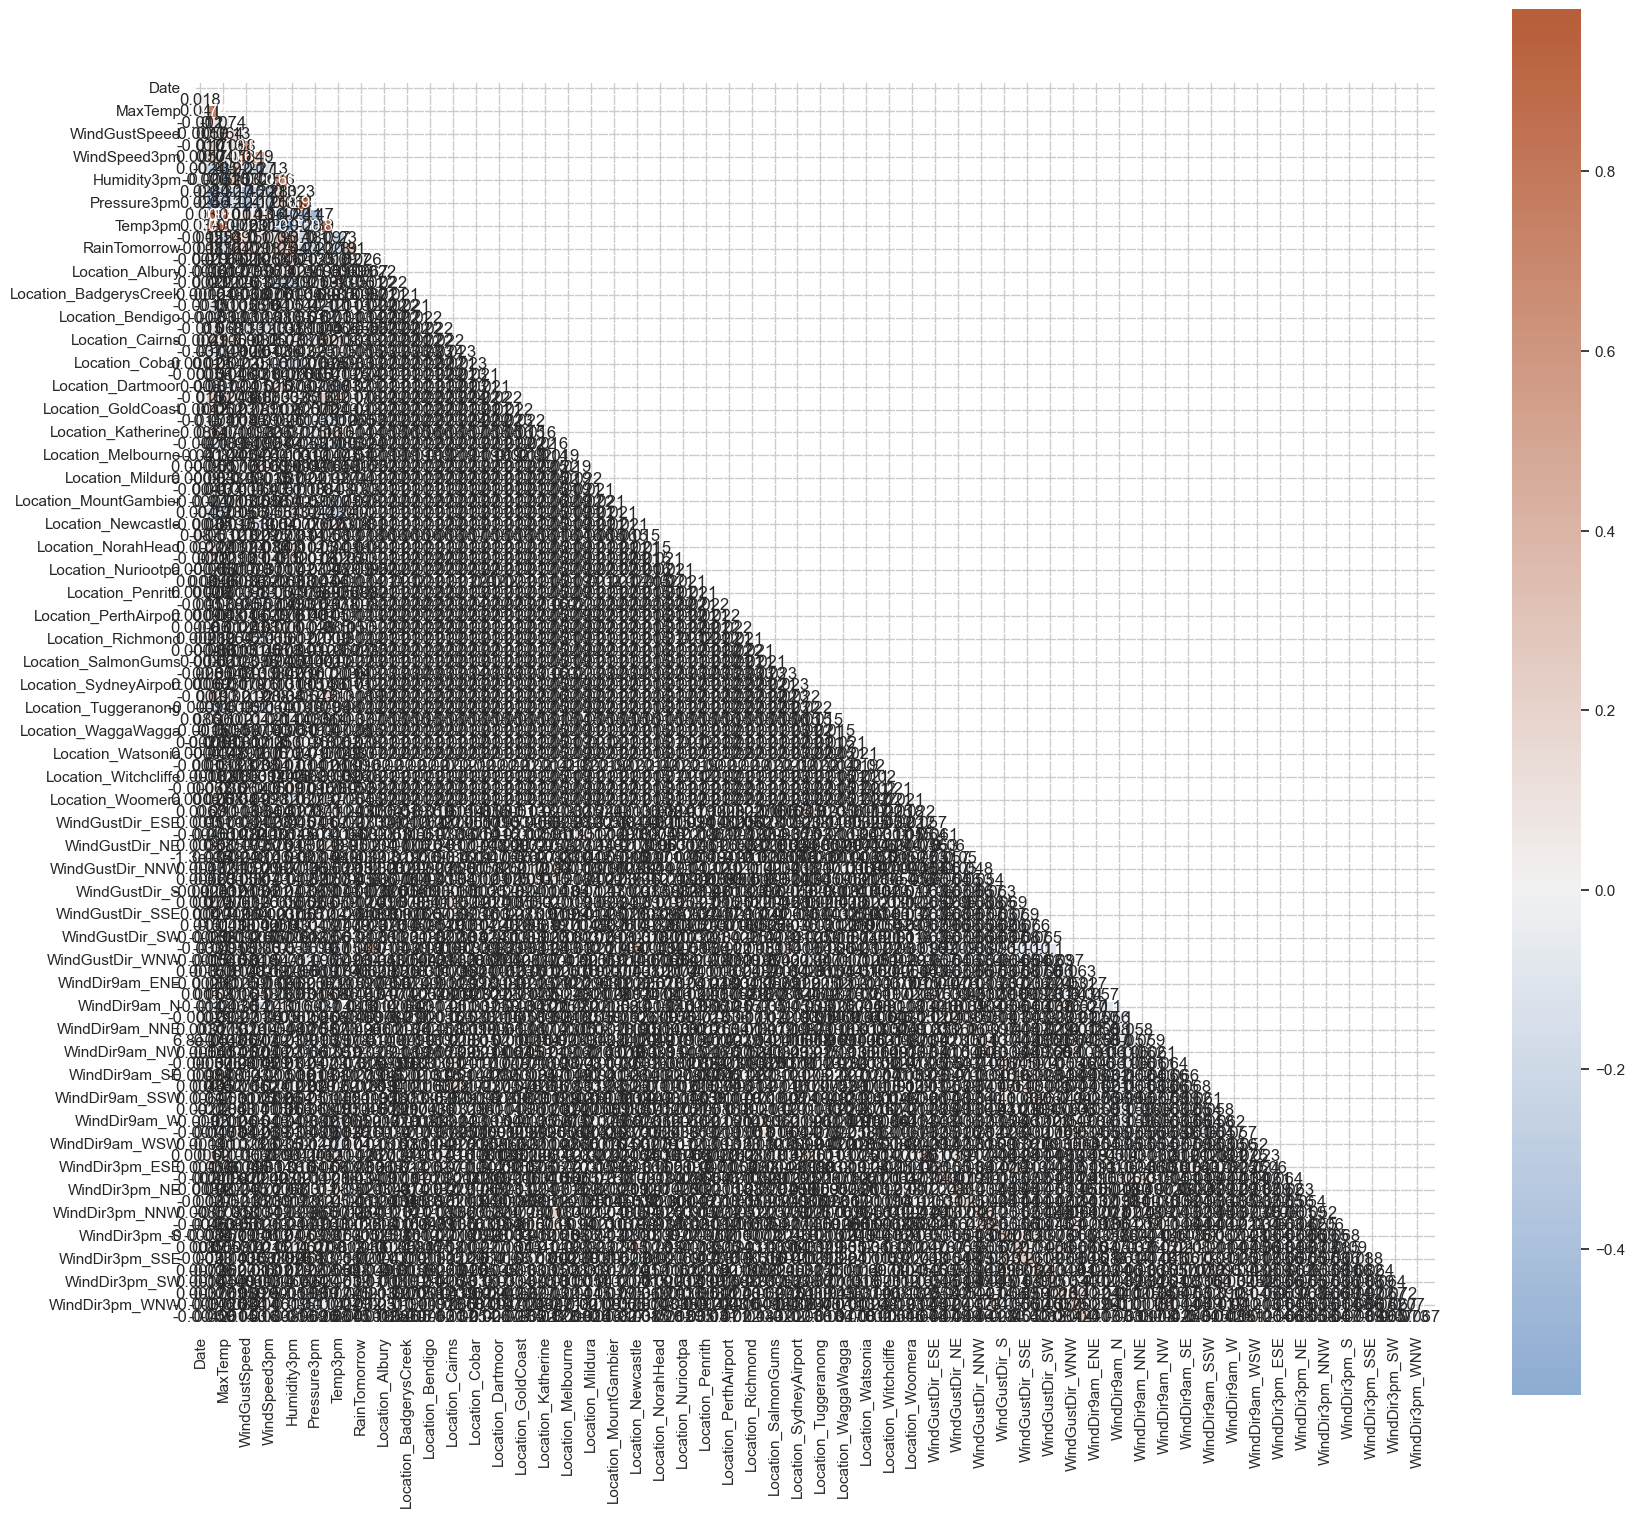

In [227]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

In [228]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm'), hue='RainTomorrow' )
plt.show()

KeyboardInterrupt: 

In [ ]:
sns.pairplot( data=MiceImputed, vars=('Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )
plt.show()

In [ ]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [ ]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

In [ ]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=target)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, roc_auc_score, cohen_kappa_score,
                             confusion_matrix, ConfusionMatrixDisplay, 
                             roc_curve, classification_report)

def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    
    if not verbose:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
        
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    
    time_taken = time.time() - t0
    
    print(f"Accuracy = {accuracy}")
    print(f"ROC Area under Curve = {roc_auc}")
    print(f"Cohen's Kappa = {coh_kap}")
    print(f"Time taken = {time_taken}")
    
    print(classification_report(y_test, y_pred, digits=5))
    
    # Plot ROC curve
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, _ = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)
    
    # Compute and plot normalized confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    ConfusionMatrixDisplay(cm_normalized, display_labels=model.classes_).plot(cmap=plt.cm.Blues)
    
    return model, accuracy, roc_auc, coh_kap, time_taken


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)



In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

In [ ]:
# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)


In [ ]:
# Catboost
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)


In [ ]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.80
width = 0.90

clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42) 
clf3 = MLPClassifier(random_state=42, verbose = 0)
clf4 = RandomForestClassifier(random_state=42)
clf5 = lgb.LGBMClassifier(random_state=42, verbose = 0)
clf6 = cb.CatBoostClassifier(random_state=42, verbose = 0)
clf7 = xgb.XGBClassifier(random_state=42)
eclf = EnsembleVoteClassifier(clfs=[clf4, clf5, clf6, clf7], weights=[1, 1, 1, 1], voting='soft')

X_list = MiceImputed[["Sunshine", "Humidity9am", "Cloud3pm"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = MiceImputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'LightGBM',
          'CatBoost',
          'XGBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value}, 
                                filler_feature_ranges={2: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

In [ ]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn, coh_kap_rf, coh_kap_lgb, coh_kap_cb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.grid()
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [ ]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.grid()
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score
import xgboost as xgb
import catboost as cb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize your previously trained models with their parameters
params_xgb = {'n_estimators': 500, 'max_depth': 16}
model_xgb = xgb.XGBClassifier(**params_xgb)

params_cb = {'iterations': 50, 'max_depth': 16}
model_cb = cb.CatBoostClassifier(**params_cb)

params_nn = {'hidden_layer_sizes': (30,30,30), 'activation': 'logistic', 'solver': 'lbfgs', 'max_iter': 500}
model_nn = MLPClassifier(**params_nn)

params_rf = {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
model_rf = RandomForestClassifier(**params_rf)

# Fit each model on the training data
model_xgb.fit(X_train, y_train)
model_cb.fit(X_train, y_train)
model_nn.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

# Create an ensemble of the models using soft voting
ensemble_model = VotingClassifier(estimators=[
        ('xgb', model_xgb),
        ('cb', model_cb),
        ('nn', model_nn),
        ('rf', model_rf)],
        voting='soft')

# Fit ensemble model on training data
ensemble_model.fit(X_train, y_train)

# Evaluate ensemble model on test data
y_pred_ensemble = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_roc_auc = roc_auc_score(y_test, y_pred_ensemble)
ensemble_coh_kap = cohen_kappa_score(y_test, y_pred_ensemble)

print(f"Ensemble Model Accuracy: {ensemble_accuracy}")
print(f"Ensemble Model ROC AUC: {ensemble_roc_auc}")
print(f"Ensemble Model Cohen's Kappa: {ensemble_coh_kap}")

# You can now compare these metrics with those of the individual models to evaluate the performance
